<a href="https://colab.research.google.com/github/pavithrak17/TITANIC-SURVIVAL-PREDICTION/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the library**

In [ ]:
#importing the lib-step1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#**Data Collection & Data Processing**

In [ ]:
#reading the data set-step2
#csv file to Pandas(pd) Dataframe
titanic_data=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
#exploring the dataset-step3
#HEAD:Printing the first 5rows of the Dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#shape:number of rows and column
titanic_data.shape

(891, 12)

Here 891 as rows , 12 as columns
[In 12 columns--->11 columns are features,1 columns are target(Target is Survived Column).

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Getting some information about this data.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#checking the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

[Age=177,Cabin=687,Embarked=2] this 3 columns are the missing values.

#**Handling the missing values**

In [ ]:
#drop the "Cabin" column from the dataframs[bcs it missing only 2 values]
#axis=1(row)to drop the row
titanic_data=titanic_data.drop('Cabin',axis=1)

In [ ]:
#replacing the missing values in "Age" column with the mean value
#fillna:fill not available values
#inplace=True:permanently(it is saved in original data)
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [ ]:
#finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
#index-->0
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
#replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [ ]:
#check the number of missing values in each columns
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#**Data Analysis**

In [ ]:
#getting sum statistical measures about the data
#describing the data in numerical values
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

549 = NOT SURVIVED [0], 342 = SURVIVED[1]

#**Data Visualization**

In [ ]:
#importing the library for data visualization
import seaborn as sns

In [ ]:
sns.set()

In [ ]:
# Print the type of titanic_data
print(type(titanic_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<ipython-input-20-ce49a97ea3e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=titanic_data , palette = "Set1" )


<Axes: xlabel='Survived', ylabel='count'>

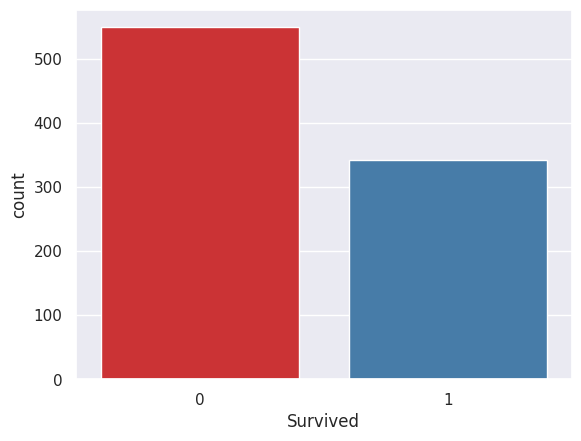

In [ ]:
#making a count plot for Survived column
Survived = ["0","0","1","1","1"]
sns.countplot(x='Survived',data=titanic_data , palette = "Set1" )

In [ ]:
#finding the number of male and female
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<ipython-input-22-80b637189065>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=titanic_data , palette = "Set1" )


<Axes: xlabel='Sex', ylabel='count'>

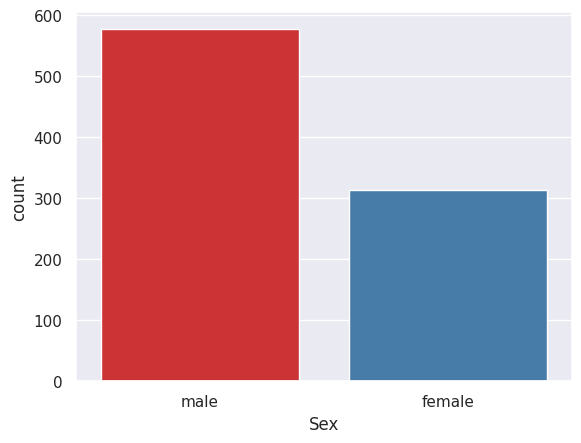

In [ ]:
#making a count plot for Sex column
Sex = ["male","male","female","female","female"]
sns.countplot(x='Sex',data=titanic_data , palette = "Set1" )

<Axes: xlabel='Sex', ylabel='count'>

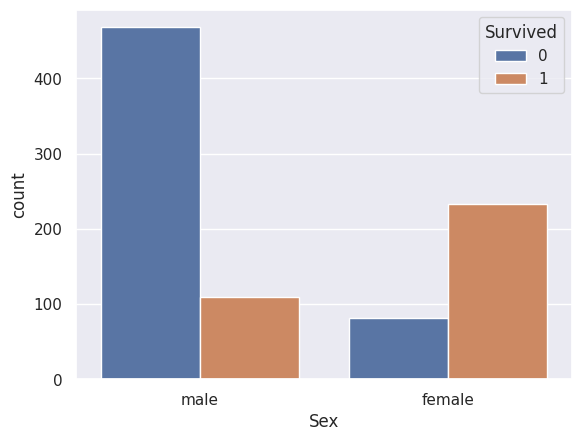

In [ ]:
# number of Survivors based on Gender
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

In [ ]:
titanic_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<ipython-input-25-09e22a5dfe6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data=titanic_data , palette = "Set1" )


<Axes: xlabel='Pclass', ylabel='count'>

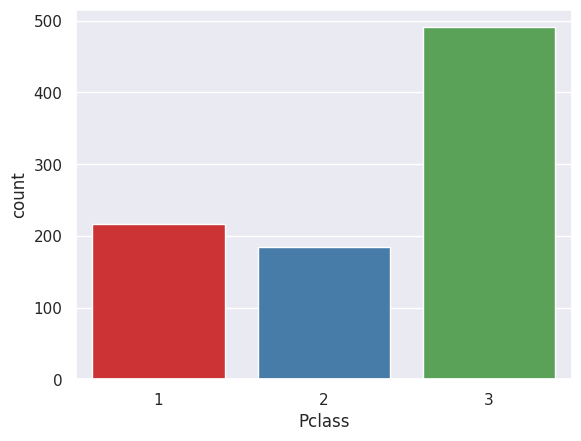

In [ ]:
#making a count plot for Sex column
Sex = ["3","3","2","2","2","1"]
sns.countplot(x='Pclass',data=titanic_data , palette = "Set1" )

<Axes: xlabel='Pclass', ylabel='count'>

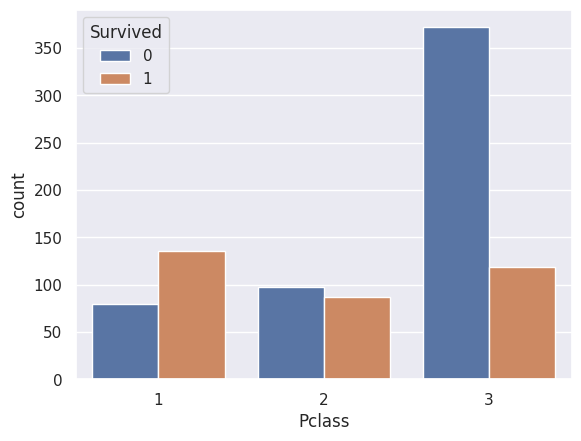

In [ ]:
# number of Survivors based on Pclass
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

In [ ]:
titanic_data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

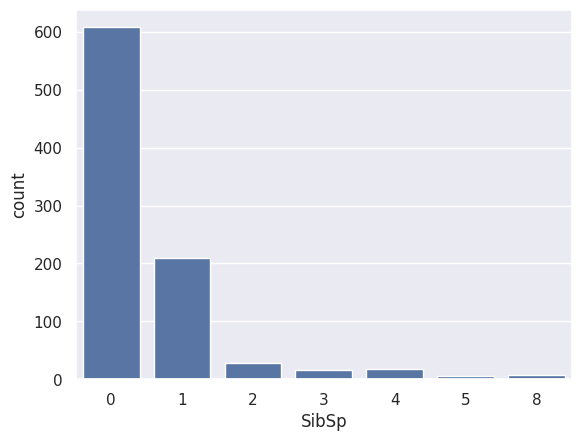

In [ ]:
sns.countplot(x='SibSp',data=titanic_data)

<Axes: xlabel='SibSp', ylabel='count'>

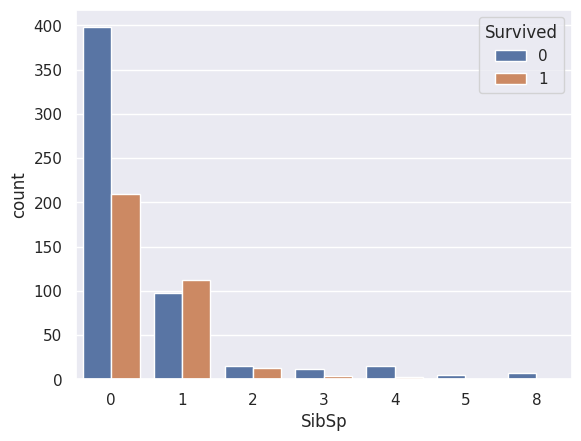

In [ ]:
# number of Survivors based on SibSp
sns.countplot(x='SibSp',hue='Survived',data=titanic_data)

In [ ]:
titanic_data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

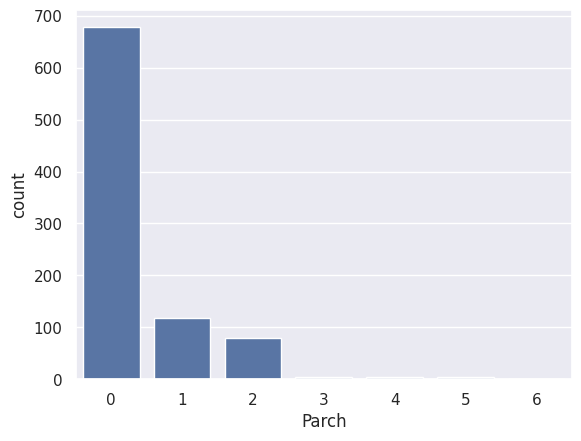

In [ ]:
sns.countplot(x='Parch',data=titanic_data)

<Axes: xlabel='Parch', ylabel='count'>

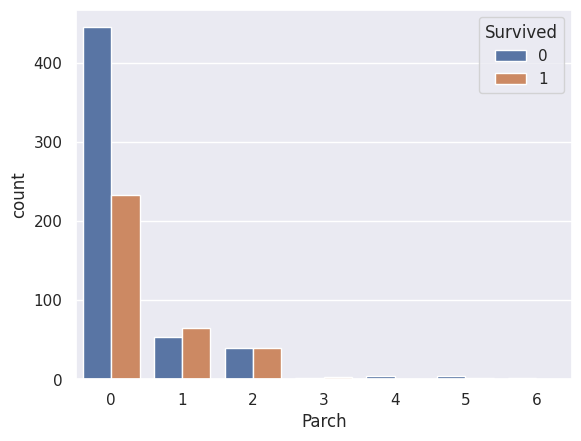

In [ ]:
# number of Survivors based on 'Parch'
sns.countplot(x='Parch',hue='Survived',data=titanic_data)

In [ ]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

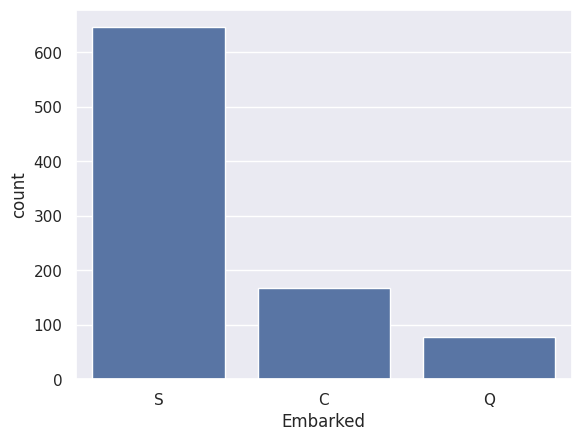

In [ ]:
sns.countplot(x='Embarked',data=titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

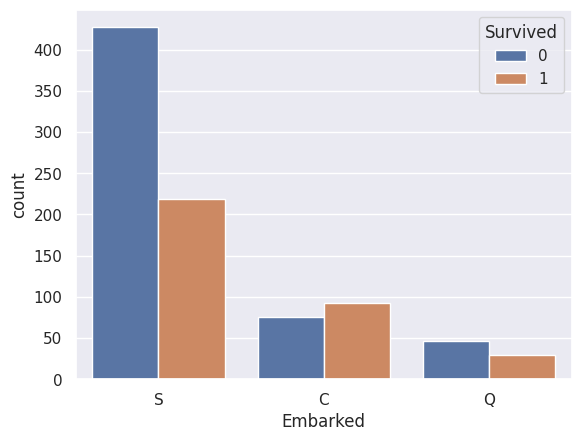

In [ ]:
# number of Survivors based on 'Parch'
sns.countplot(x='Embarked',hue='Survived',data=titanic_data)

# **Encoding the categorical columns into numerical data**

In [ ]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
titanic_data.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [ ]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic_data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# **Separating the data as Features and Target**

In [ ]:
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# **Splitting the data into training data and testing data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


# **Model Training**
# [Logistic Regression]

In [ ]:
#import the model
from sklearn.linear_model import LogisticRegression

In [ ]:
titanic_model=LogisticRegression()

In [ ]:
#training the LogisticRegression with training data
titanic_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation [Accuracy_Score]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#accuracy on training data
X_train_prediction=titanic_model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [ ]:
training_data_acccuracy=accuracy_score(Y_train,X_train_prediction)

In [ ]:
print('Accuracy Score of training data:', training_data_acccuracy)

Accuracy Score of training data: 0.8075842696629213


In [ ]:
#accuracy on testing data
X_test_prediction=titanic_model.predict(X_test)

In [ ]:
testing_data_acccuracy=accuracy_score(Y_test,X_test_prediction)

In [ ]:
print('Accuracy Score of testing data:', testing_data_acccuracy)

Accuracy Score of testing data: 0.7821229050279329
